In [1]:
%pip install python-dotenv
%pip install langchain
%pip install langchain-core langchain-community
%pip install transformers

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Huggingface
%pip install langchain-huggingface huggingface_hub
#google
%pip install langchain-google-genai google-genai

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
from langchain_huggingface import HuggingFaceEndpoint
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from dotenv.main import load_dotenv
import warnings
warnings.simplefilter(action='ignore' , category=FutureWarning)


In [11]:
#loading apikey from dotenv
load_dotenv("api.env")

#setting up llm model
llm = HuggingFaceEndpoint(
    task= "text-generation",
    repo_id="mistralai/Mistral-7B-Instruct-v0.2", 
    temperature=0.5,max_new_tokens=250,)

question = "what is the capital of South Korea?"
response = llm.invoke(question)
print(response)

 Seoul

Seoul is indeed the capital city of South Korea. It is the largest metropolis in the country and is home to over half of South Korea's population. Seoul is known for its rich history, vibrant culture, advanced technology, and modern infrastructure. Some of the popular tourist attractions in Seoul include Gyeongbokgung Palace, Namsan Tower, Bukchon Hanok Village, and Myeong-dong Shopping District.


In [13]:
from langchain_google_genai import GoogleGenerativeAI

#loading api key from dotenv
load_dotenv("api.env")

#setting up llm model
llm = GoogleGenerativeAI(model="gemini-2.0-flash")
question = "Is HTML considered a programming language?"
response = llm.invoke(question)
print(response)


No, HTML is **not** considered a programming language. It's a **markup language**.

Here's why:

*   **Programming Languages Define Logic and Behavior:** Programming languages (like Python, JavaScript, Java, C++) allow you to write instructions that a computer can execute to perform tasks, make decisions, and manipulate data. They have features like variables, loops, conditional statements, and functions.

*   **Markup Languages Define Structure and Presentation:** HTML (HyperText Markup Language) is used to structure and format content on a webpage. It uses tags to define elements like headings, paragraphs, images, links, and more. It tells the browser how to *display* the information, but it doesn't define any logic or behavior.

**Key Differences:**

| Feature         | Programming Language | Markup Language (e.g., HTML) |
|-----------------|-----------------------|--------------------------------|
| Purpose         | Create executable programs | Structure and format content  |
| Lo

In [14]:
from langchain.llms.fake import FakeListLLM
fake_llm = FakeListLLM(responses=["Hello"])
fake_llm.invoke("Hi and goodbye, FakeListLLM!")

'Hello'

In [18]:
prompt = """
Summarize this text in one short korean sentence
(in 90 characters or less):
{text}
"""
llm = GoogleGenerativeAI(model="gemini-2.0-flash")

summary = llm.invoke(prompt.format(text= "한양대학교(총장 이기정)는 '2025 QS 세계대학 학문분야별 평가(QS World University Rankings by Subject 2025)'에서 역대 최고 성과를 기록하며 글로벌 경쟁력을 한층 강화했다고 13일 밝혔다. 올해 평가에서 한양대는 전통적으로 강세를 보인 공학 및 자연과학뿐만 아니라, 인문학과 사회과학 등 다양한 학문 분야에서 고르게 성장하며 학문적 균형을 갖춘 대학으로서의 입지를 더욱 공고히했다."))

print(summary)

한양대학교는 2025 QS 세계대학 학문분야별 평가에서 역대 최고 성과를 내며 공학, 자연과학, 인문사회 등 다양한 분야에서 고르게 성장, 글로벌 경쟁력을 강화했다.


In [19]:
from langchain_core.prompts import ChatPromptTemplate

#Define a ChatPromptTemplate to translate text
template = ChatPromptTemplate.from_messages([
    ('system','You are an English to Japanese & Korean translator.'),
    ('user', 'Translate this to Japanese & Korean: {text}')])

llm = GoogleGenerativeAI(model="gemini-2.0-flash", max_output_tokens=500, temperature=0.5)

#Translate
response = llm.invoke(template.format_messages(text="Shining through the city with a little funk and soul"))
print(response)

Okay, here are the translations of "Shining through the city with a little funk and soul" into Japanese and Korean:

**Japanese:**

*   **ファンクとソウルを少しだけまぶして、街を輝きながら進む** (Fanku to souru o sukoshi dake mabushite, machi o kagayaki nagara susumu)

    *   This is a more literal translation, emphasizing the "funk and soul" as being something that's adding to the shining.
    *   ファンク (fanku): funk
    *   ソウル (souru): soul
    *   少しだけ (sukoshi dake): a little
    *   まぶして (mabushite): sprinkling, adding
    *   街を (machi o): the city
    *   輝きながら (kagayaki nagara): while shining
    *   進む (susumu): to advance, to go forward

**Korean:**

*   **약간의 펑크와 소울로 도시를 환하게 비추며** (Yakkan-ui peongkeu-wa soul-euro dosi-reul hwanhage bichumyeo)

    *   약간의 (yakkan-ui): a little
    *   펑크 (peongkeu): funk
    *   소울 (soul): soul
    *   로 (ro): with
    *   도시를 (dosi-reul): the city
    *   환하게 (hwanhage): brightly, radiantly
    *   비추며 (bichumyeo): shining, illuminating

I hope this helps!


In [41]:
#Using zero-shot prompting

from langchain_google_genai import GoogleGenerativeAI
from langchain.schema import HumanMessage

#initialize the chat model
llm = GoogleGenerativeAI(model= "gemini-2.0-flash")

#Generate a conversation
response = llm.invoke([HumanMessage(content = "What is the purpose of model regularisation")])
print(response)

The purpose of model regularization is to **prevent overfitting** and **improve the generalization performance** of a machine learning model.  Let's break down what that means:

*   **Overfitting:** Overfitting occurs when a model learns the training data *too well*. It captures not only the underlying patterns but also the noise and specific quirks of the training set.  This leads to excellent performance on the training data but poor performance on new, unseen data (the test set or real-world data). Think of it like memorizing answers to a specific test instead of understanding the underlying concepts.

*   **Generalization:** Generalization refers to how well a model performs on unseen data after being trained on a training set.  A good model should be able to generalize well, meaning it can accurately predict outcomes for new data points it hasn't encountered before.

**How Regularization Works:**

Regularization techniques work by adding a penalty to the model's complexity.  This 

In [42]:
#Role based Prompting _ system Message;
from langchain_core.messages import SystemMessage

chat_output = llm.invoke([
SystemMessage(content="You're a middle school student"),HumanMessage(content= "What is the purpose of model regularization?")])

print(chat_output)

Okay, so imagine you're trying to learn how to predict the score of a basketball game. You could try to memorize every single game you've ever seen, right? Like, "Okay, if the Lakers are playing the Celtics and LeBron has a good hair day, the score will be 110-105!"

But that's a bad idea, right? Because every game is different. You're just memorizing specific details that probably won't happen again. That's called *overfitting*. You're fitting your "model" (your brain, in this case) too perfectly to the training data (the games you've seen).

Model regularization is like teaching you *general* principles instead of memorizing everything. It's a technique that makes the model (like a computer program) less likely to overfit. It basically says, "Hey model, don't get too fancy! Keep it simple!"

Think of it like this:

*   **Without regularization:** You're memorizing every little detail, even the irrelevant stuff. Like, "If the ref has a blue shirt, the Celtics will get more fouls!"
*  

In [ ]:
#Few-shot Prompting - FewShotPromptTemplate

from langchain_core.prompts import PromptTemplate, FewShotPromptTemplate
example_prompt = PromptTemplate.from_template('Input:"{sentence}"\nSentiment: {sentiment}')
examples = [
{ "sentence": "I love this product! It works perfectly.", 
  "sentiment": "Positive" },
{ "sentence": "This is the worst service I’ve ever received.", 
  "sentiment": "Negative" },
{ "sentence": "The experience was okay, not great but not terrible either.", 
  "sentiment": "Neutral" }
]
prompt = FewShotPromptTemplate(
examples=examples,
example_prompt=example_prompt,
suffix='Input: "{input}"\nSentiment:',
input_variables=["input"],
)
llm = GoogleGenerativeAI(model="gemini-2.0-flash")
response = llm.invoke(prompt.format(input = "I'm really impressed with your work!"))
print(response)

Positive


In [76]:
#Chain of Thought Prompting (before Chain of Thought)

prompt = """
Answer the following questions.
{text}
"""

llm = GoogleGenerativeAI(model = "gemini-2.0-flash")
repsonse = llm.invoke(prompt.format(text= "A+ is 4.5 points. A0 is 4.0 points. What is the score of C+?"))

print(response)

Seoul cityscape at sunset, featuring the Han River flowing through the city and Namsan Tower prominently visible.


In [77]:
#Chain of Thought Prompting (After Chain of Thought)

prompt = """
Answer the following questions step-by-step, showing your resoning.
{text}
"""

llm = GoogleGenerativeAI(model = "gemini-2.0-flash")
repsonse = llm.invoke(prompt.format(text= "A+ is 4.5 points. A0 is 4.0 points. What is the score of C+?"))

print(response)

Seoul cityscape at sunset, featuring the Han River flowing through the city and Namsan Tower prominently visible.


In [50]:
from langchain import LLMChain
from langchain_core.prompts import PromptTemplate

template = """Question: {question}
Answer: Let's think step by step."""

prompt = PromptTemplate(template=template,
input_variables=["question"])
llm = GoogleGenerativeAI(model="gemini-2.0-flash",
max_output_tokens=500, temperature=0.5)

llm_chain = LLMChain(prompt=prompt, llm=llm,
verbose=True)

question = "Who was the president of USA when IU made her debut?"
ans = llm_chain.run(question)
print(ans)

/tmp/ipykernel_76/3512587627.py:10: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  llm_chain = LLMChain(prompt=prompt, llm=llm,
/tmp/ipykernel_76/3512587627.py:13: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  ans = llm_chain.run(question)




> Entering new LLMChain chain...
Prompt after formatting:
Question: Who was the president of USA when IU made her debut?
Answer: Let's think step by step.

> Finished chain.
Okay, let's figure this out.

*   IU debuted in South Korea in September 2008.
*   We need to determine who was the US President in September 2008.

George W. Bush was the President of the United States in September 2008.

So the answer is George W. Bush.


In [53]:
from langchain_core.prompts import PromptTemplate

template = """Question: {question}
Answer: Let's think step by step."""
prompt = PromptTemplate(template=template,
input_variables=["question"])

llm_chain = prompt | llm

question = "Who was the president of USA when IU made her debut?"
ans = llm_chain.invoke(question)
print(ans)

Okay, let's figure this out.

*   IU debuted in South Korea on September 18, 2008.
*   We need to determine who was the US president in September 2008.
*   George W. Bush was the US president from 2001 to 2009.

Therefore, the president of the USA when IU made her debut was George W. Bush.


In [74]:
#Generating images from texts

import os
from langchain.chains import LLMChain
from langchain_core.prompts import PromptTemplate
from langchain_google_genai import GoogleGenerativeAI
from langchain_core.messages import AIMessage, HumanMessage
from dotenv.main import load_dotenv

load_dotenv("api.env")

llm = GoogleGenerativeAI(model="gemini-2.0-flash", temperature=0.5)
prompt = PromptTemplate(
input_variables=["image_desc"],
template=(
"Create one concise prompt that generates an image,as described below.:"
"{image_desc}"
))
chain = prompt | llm
response = chain.invoke({"image_desc": "Beautiful Seoul with Han River and Namsan Tower"})

print(response)

Seoul cityscape at sunset, featuring the Han River flowing through the city and Namsan Tower prominently visible.


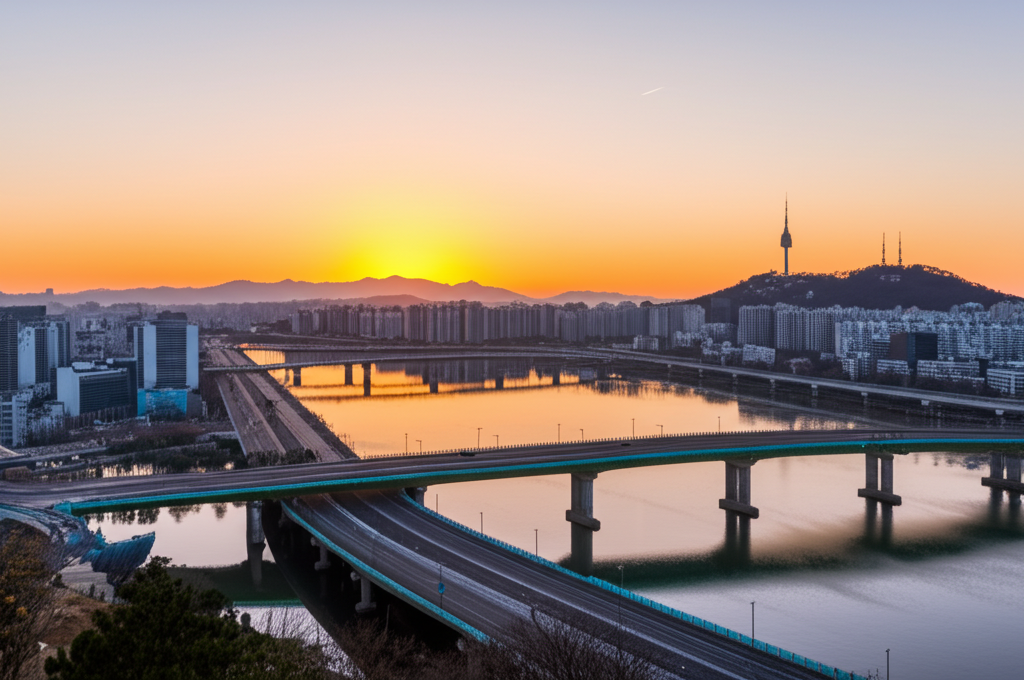

In [75]:
#Part 2 of generating images with texts

from google import genai
from google.genai import types
from io import BytesIO
from PIL import Image

google_client = genai.Client(api_key=os.getenv('GOOGLE_API_KEY'))
generated_content = google_client.models.generate_content(
    model="gemini-2.0-flash-exp-image-generation",
    contents=response,
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
    )
)

for part in generated_content.candidates[0].content.parts:
    if part.inline_data is not None:
        image = Image.open(BytesIO((part.inline_data.data)))
        image.show() 

In [69]:
from langchain_google_genai import ChatGoogleGenerativeAI

load_dotenv("api.env")
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")
questions = ["한양대학교는 어디에 있어?", "Where is Hanyang University?"]

for q in questions:
    response = llm.invoke(q)

print(q)
print(response.content)
print(response.response_metadata)
print(response.usage_metadata)

Where is Hanyang University?
Hanyang University has two main campuses:

*   **Seoul Campus:** Located in Seongdong-gu, Seoul, South Korea.
*   **ERICA Campus (Education Research Industry Cluster at Ansan):** Located in Ansan, Gyeonggi Province, South Korea.
{'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}
{'input_tokens': 6, 'output_tokens': 57, 'total_tokens': 63, 'input_token_details': {'cache_read': 0}}
